<a href="https://colab.research.google.com/github/Overleaff/MushroomClassification/blob/main/MushroomClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom classification
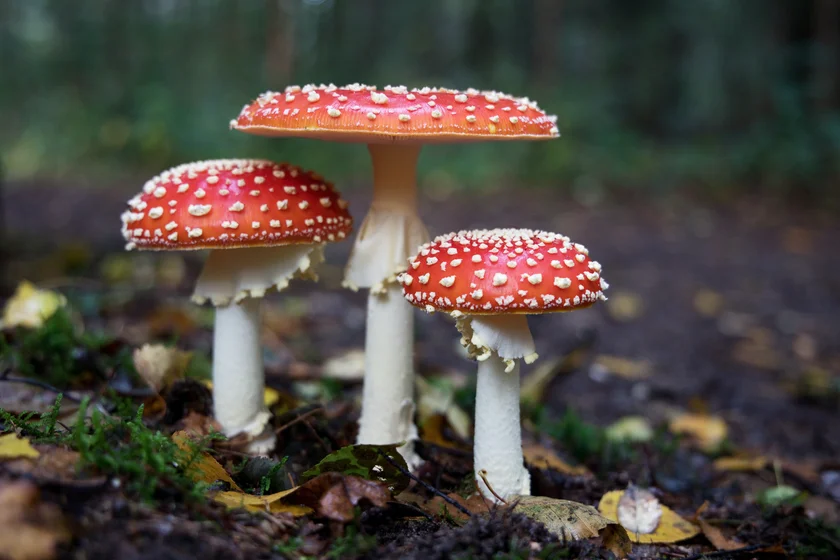

**About Dataset**\
**Context**

> Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**

> This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

**Inspiration**

> Which features are most indicative of a poisonous mushroom?\
What types of machine learning models perform best on this dataset?
1.   Logistic regression
2.   Support vector machine
3.   Random forest









# Preprocessing

In [ ]:
## Download dataset to execute model
!curl -O https://raw.githubusercontent.com/Overleaff/image/main/mushrooms.csv

path = "mushrooms.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  365k  100  365k    0     0  2484k      0 --:--:-- --:--:-- --:--:-- 2484k


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
## Read the dataset and save it into variable dataset
dataset = pd.read_csv(path)

In [ ]:
## Test to see 5 heading rows in the dataset
dataset.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Show the dataset information
## In this information, we can see that there are no null rows
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
#Split the target column from training columns
y = dataset['class']
X = dataset.drop('class', axis=1) 

In [ ]:
# Convert all the labels into numerical data 
X = pd.get_dummies(X)

lblencode = LabelEncoder()
y = lblencode.fit_transform(y)

In [ ]:
#Spliting test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

#EDA 
##Column Distribution 


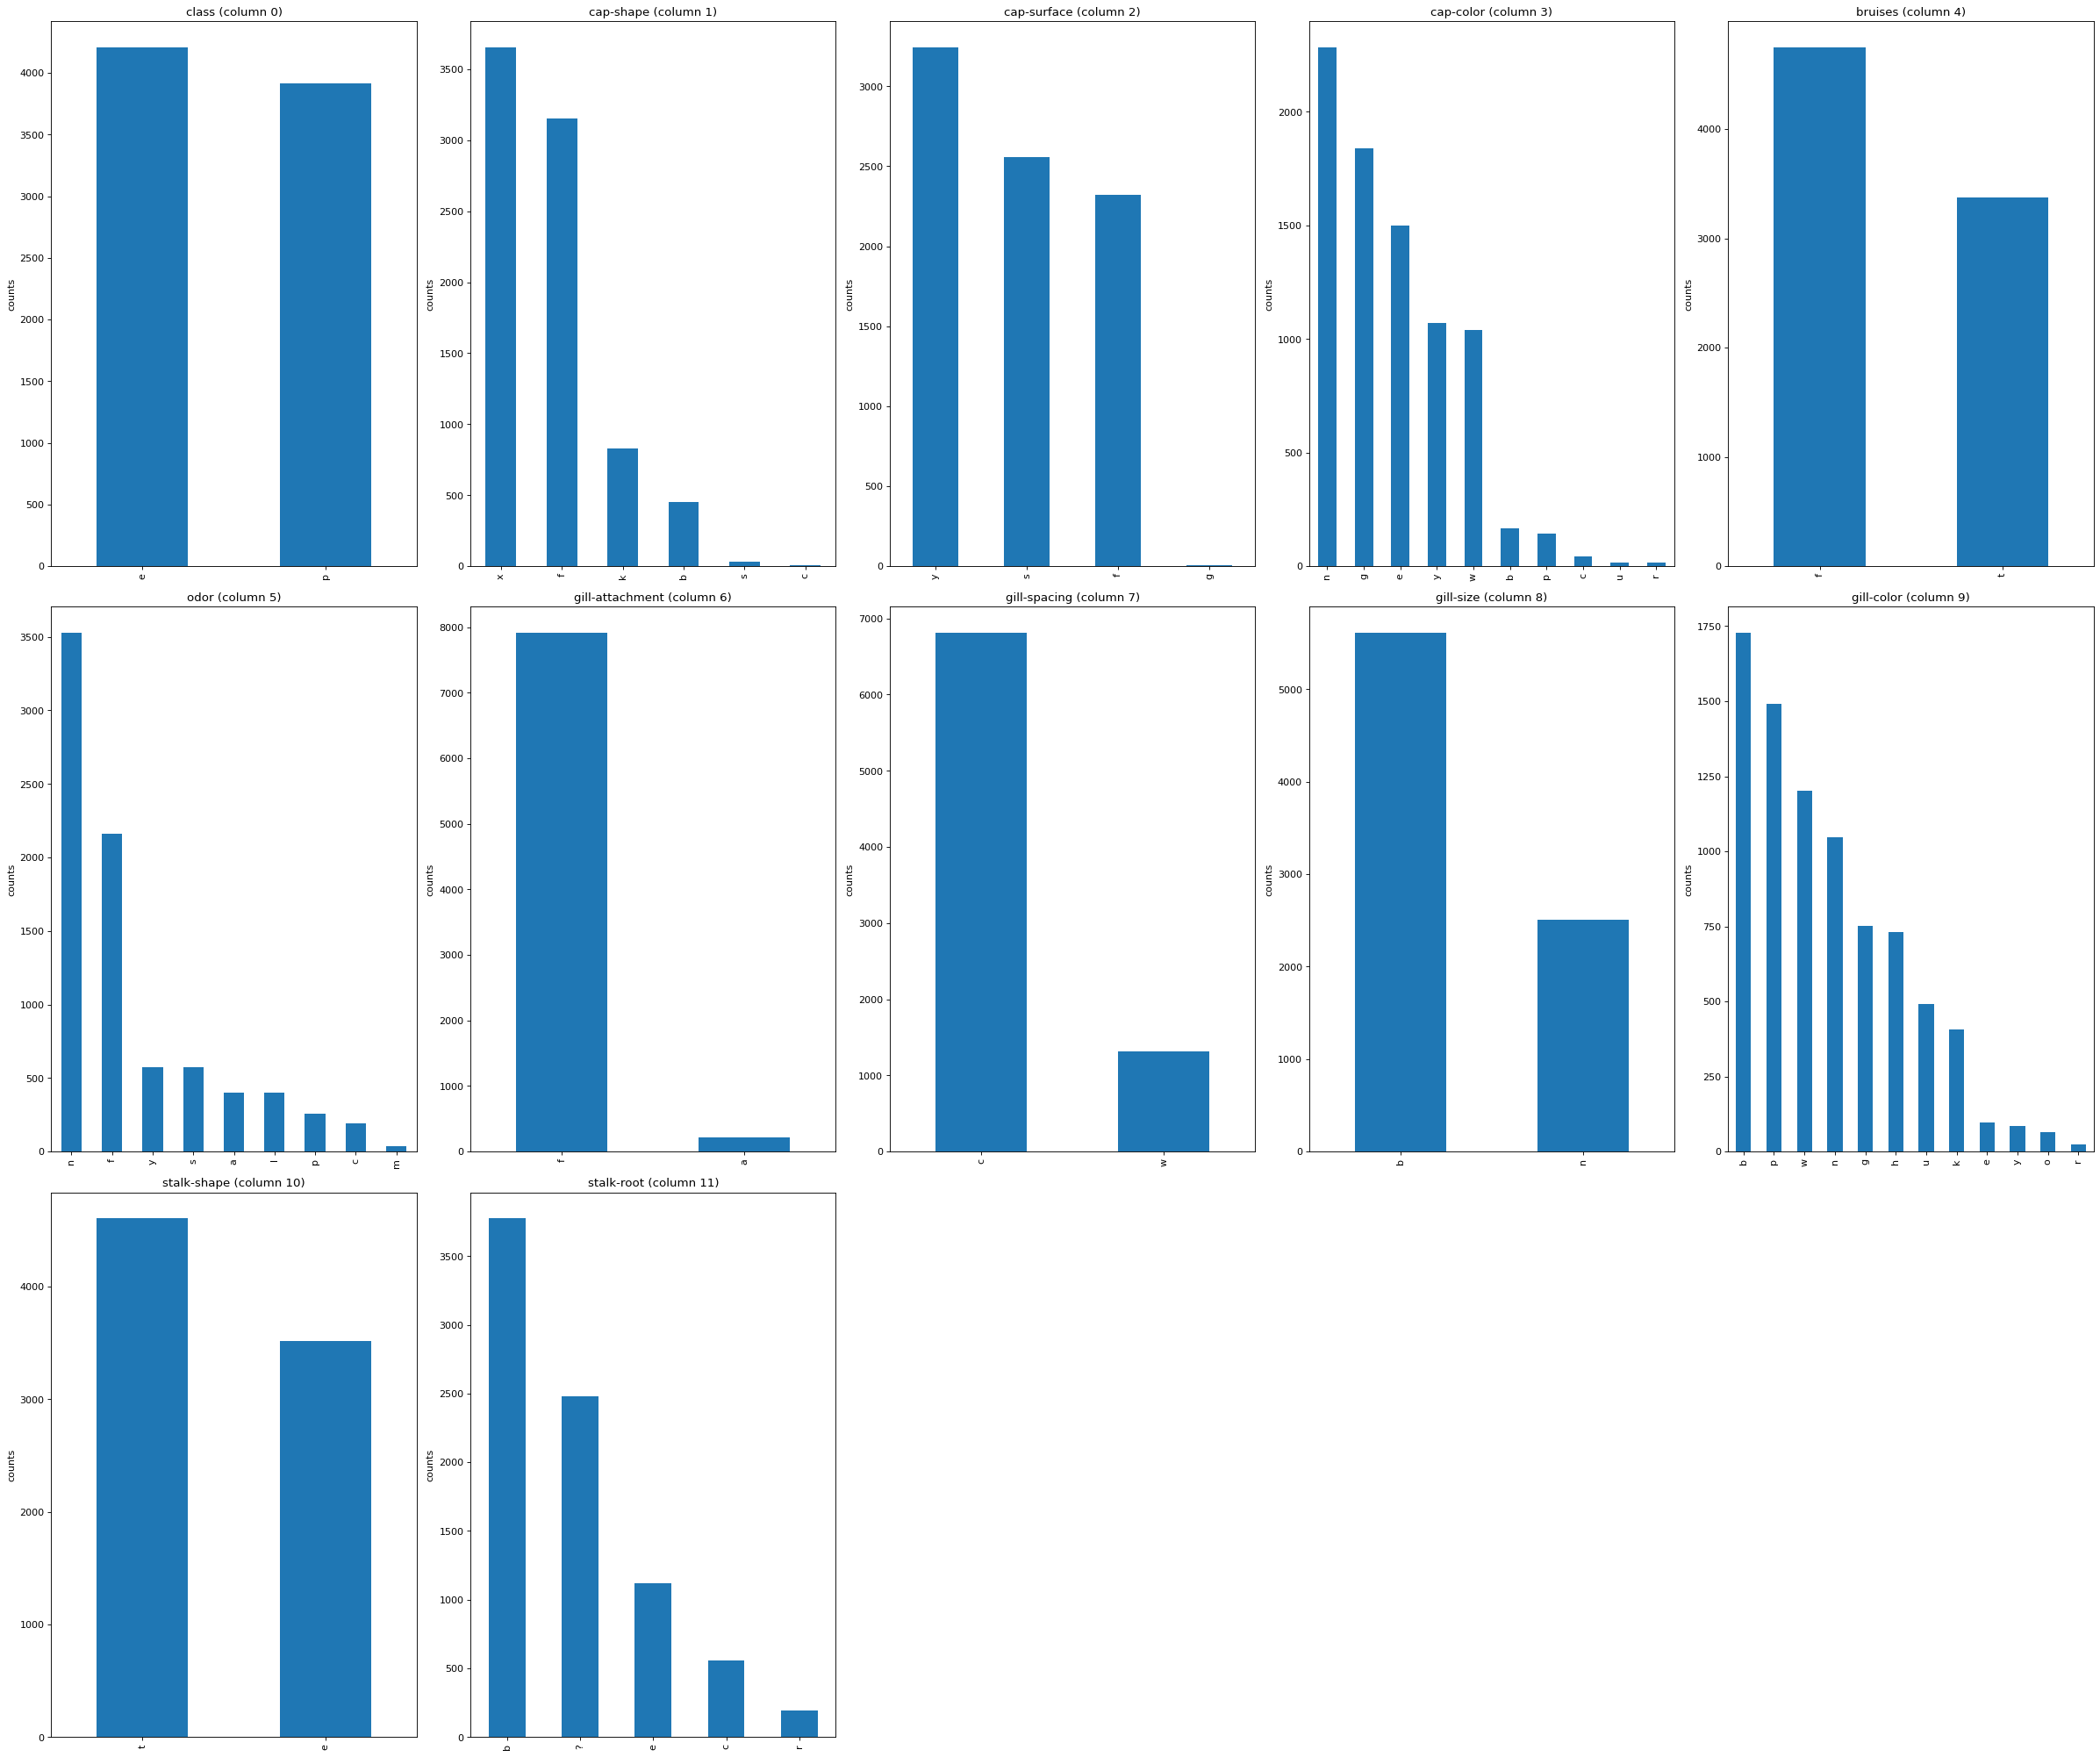

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
  
plotPerColumnDistribution(dataset, 12, 5)

# Logistic Regression

In [ ]:
def init_weight_and_bias(dimension):
    w = np.full((dimension,1),0.01)          # just creating a dimension sized vector filled with our weight value (0.01)
    b = 0.0                                  # smallest float value is setted to the bias (0.0)
   # print("w::",w)
   # print("b::",b)
    return w,b;

def sigmoid(z):
    y_head = 1/(1 + np.exp(-z))               # implementing the sigmoid function
   # print("y_head::",y_head)
    return y_head;

def forward_and_backward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b             # first phase of actual Computation of the Logistic Regression:: multiplying the weights with corresponding values then adding bias..
    y_head = sigmoid(z)                     # second phase:: Applying the sigmoid on the result of first phase to get result between 0 and 1.
    
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)        # calculating loss and cost is key to optimize since they are the value of fail 
  #  print("loss::",loss)
    cost = (np.sum(loss)) / x_train.shape[1]
  #  print("forw_bck::",cost)
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/ x_train.shape[1]     # applying gradient descent
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    
    gradients = {"deriv_weight":derivative_weight,"deriv_bias":derivative_bias}  # putting all in dictionary
    
    return cost, gradients;

def update(w,b,x_train,y_train,learning_rate,num_of_iter):
    cost_list = []   # empty arrays to store costs
    index = []
    
    for i in range(num_of_iter):
        cost, gradients = forward_and_backward_propagation(w,b,x_train,y_train)  # do the training as much as iteration given
      #  print("update:: ",cost)
        cost_list.append(cost)      # insert the calculated cost on array
        index.append(i)
        
        w = w - learning_rate*gradients["deriv_weight"]     # set new weights and bias for next iteration
        b = b - learning_rate*gradients["deriv_bias"]
        
    parameters = {"weight":w,"bias":b}    # save all the weights and biases on a dictionary
    plt.plot(index,cost_list)            # draw the plot to visualize (optional)
    plt.show()
    
    return parameters, gradients, cost_list;


def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test) + b)           # do the first and second phase of Computation and store in array z
    y_prediction = np.zeros((1,x_test.shape[1]))  # create empty array to fill by results of z
   # print("y_pred:::", np.zeros((1,x_test.shape[1])))
    
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,i] = 0;
        else:
            y_prediction[0,i] = 1;
    
    return y_prediction;  

def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_of_iter):
    
    dimension = x_train.shape[0]
    w,b = init_weight_and_bias(dimension)
    
    parameters, gradients, col_list = update(w,b,x_train,y_train,learning_rate,num_of_iter)
    
    y_pred_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_pred_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("train accuracy: {} %".format(100-np.mean(np.abs(y_pred_train-y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(y_pred_test-y_test))*100))

    return y_pred_test

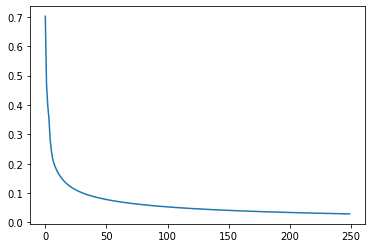

train accuracy: 99.66584593739007 %
test accuracy: 99.63084495488106 %


In [ ]:
y_pred = logistic_regression(X_train,y_train ,X_test , y_test,learning_rate=1,num_of_iter=250)

y_test = y_test.reshape(1,2438)

# cm = confusion_matrix(y_test, y_pred)
# f = sns.heatmap(cm, annot=True)

# SVM

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
svm_model= svc = svm.SVC()

tuned_parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svm_model, tuned_parameters)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
clf.fit(X_train, y_train)
print(clf.best_score_)

1.0


In [ ]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


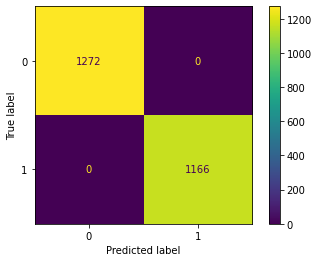

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)  

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
model_RR=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2'], 'max_depth': range(5, 50, 5)
                    }

In [ ]:
RR_model= RandomizedSearchCV(model_RR, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

In [ ]:
RR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(5, 50, 5),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': range(10, 100, 10),
                                        'n_estimators': range(10, 100, 10)},
                   scoring='accuracy')

In [ ]:
print(RR_model.best_params_)

{'n_estimators': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 20}


In [ ]:
y_prob = RR_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
RR_model.score(X_test, y_pred)

1.0

In [ ]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[1272,    0],
       [   2, 1164]])

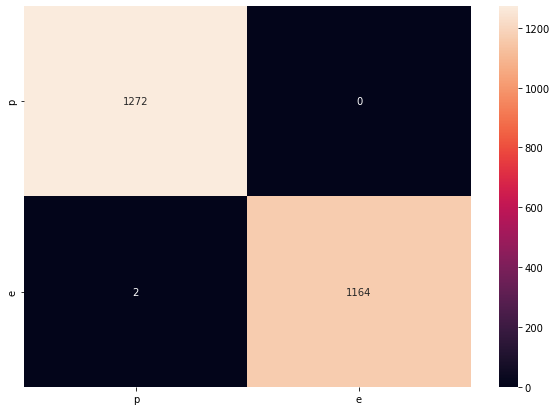

In [ ]:
df_cm = pd.DataFrame(confusion_matrix, index = ['p', 'e'],
                  columns = ['p', 'e'])
plt.figure(figsize = (10,7))

sns.heatmap(df_cm, annot=True, fmt="d")